Nombre: Víctor

Apellidos: Toscano Durán

##  MUNDO MALLA


El ejemplo de mundo malla es una idealización del movimiento de un robot en un entorno. En cada momento, el robot se encuentra en una ubicación y puede desplazarse a las ubicaciones vecinas, recogiendo recompensas y castigos. Supongamos que las acciones son estocásticas, de modo que existe una distribución de probabilidad sobre los estados resultantes dada la acción y el estado.

En la figura adjunta se muestra un mundo cuadriculado de 10×10, en el que el robot puede elegir una de cuatro acciones: arriba, abajo, izquierda o derecha. Si el agente lleva a cabo una de estas acciones, tiene una probabilidad de 0.7 de dar un paso en la dirección deseada y una probabilidad de 0.1 de dar un paso en cualquiera de las otras tres direcciones. Si choca contra la pared exterior (es decir, la ubicación calculada está fuera de la malla), tiene una penalización de 1 (es decir, una recompensa de −1) y el agente no se mueve. Hay cuatro estados con recompensa (aparte de las paredes): +10 (en la posición (9,8)), +3 (en (8,3)), −5(en (4,5)) y −10(en (4,8)). En cada uno de estos estados, el agente obtiene la recompensa después de realizar una acción en ese estado, no cuando entra en él. Cuando el agente alcanza uno de los estados con recompensa positiva (ya sea +3 o +10),independientemente de la acción que realice, en el siguiente paso es lanzado, al azar, a una de las cuatro esquinas del mundo cuadriculado.

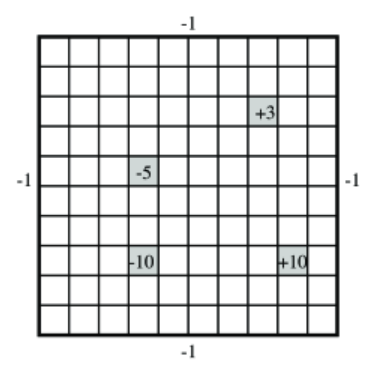

- 1 Representa gráficamente el MDP.

- 2 Resuelve el MDP utilizando iteración de valor sin descuento (es decir, iteración de valor con un factor de descuento de 1
).

In [16]:
import numpy as np

# Tamaño del mundo de la malla
tamano_malla = 10

# Se definen las acciones posibles:: arriba, abajo, izquierda, derecha
acciones = ['UP', 'DOWN', 'LEFT', 'RIGHT'] #Las definimos en ingles ya que en español arriba y abajo empiezan por A.

# Se definen la probabilidad de transicion
prob_accion = 0.7
prob_aleatoria = 0.1

# Se define los estados con recompensa con su recompensa específica
recompensas = {
    (7,8): 10, #1 eje fila y 2 eje columna
    (7,3): -10,
    (5,4): -5,
    (2,7): -10
}

# Inicialización de valores de utilidad y política
utilidad = np.zeros((tamano_malla, tamano_malla))
politica = np.zeros((tamano_malla, tamano_malla), dtype=str)

# Función de utilidad para verificar si un estado está dentro de la malla
def dentro_de_la_malla(estado):
    x, y = estado
    return 0 <= x < tamano_malla and 0 <= y < tamano_malla


while True:
    delta = 0
    for x in range(tamano_malla):
        for y in range(tamano_malla):
            estado = (x, y)
            if estado in recompensas:
                continue

            max_utilidad = float('-inf')
            max_accion = None

            for accion in acciones:
                new_x, new_y = x, y

                if accion == 'UP':
                    new_x -= 1
                elif accion == 'DOWN':
                    new_x += 1
                elif accion == 'LEFT':
                    new_y -= 1
                elif accion == 'RIGHT':
                    new_y += 1

                nuevo_estado = (new_x, new_y)

                if not dentro_de_la_malla(nuevo_estado):
                    continue

                penalizacion = 0
                if nuevo_estado not in recompensas:
                    penalizacion = -1

                utilidad_accion = prob_accion * (penalizacion + utilidad[nuevo_estado[0], nuevo_estado[1]])
                for siguiente_accion in acciones:
                    if siguiente_accion == accion:
                        utilidad_accion += prob_aleatoria * (penalizacion + utilidad[new_x, new_y])
                    else:
                        utilidad_accion += (prob_aleatoria / 3) * (penalizacion + utilidad[x, y])

                if utilidad_accion > max_utilidad:
                    max_utilidad = utilidad_accion
                    max_accion = accion

            utilidad[x, y] = max_utilidad
            politica[x, y] = max_accion

            delta = max(delta, abs(max_utilidad - utilidad[x, y]))

    if delta < 1e-6:
        break

# Imprimir política óptima
print("Política óptima:")
for fila in politica:
    print(fila)

Política óptima:
['D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D']
['D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D']
['D' 'D' 'D' 'D' 'D' 'D' 'R' '' 'L' 'D']
['D' 'D' 'D' 'D' 'D' 'D' 'U' 'U' 'U' 'D']
['D' 'D' 'D' 'D' 'D' 'D' 'D' 'U' 'D' 'D']
['D' 'D' 'D' 'R' '' 'L' 'D' 'D' 'D' 'D']
['D' 'D' 'D' 'D' 'U' 'U' 'D' 'D' 'D' 'D']
['D' 'D' 'R' '' 'L' 'D' 'D' 'R' '' 'L']
['D' 'D' 'U' 'U' 'U' 'D' 'D' 'U' 'U' 'U']
['R' 'R' 'R' 'U' 'R' 'R' 'R' 'R' 'U' 'U']


- 3 Describe la politica óptima

La descripción de la política óptima obtenida:

- En la primera fila, todas las acciones son 'D' (abajo). Esto significa que en la mayoría de los estados de la primera fila, la acción óptima es moverse hacia abajo.

- En la segunda fila, todas las acciones también son 'D', lo que indica que en la mayoría de los estados de la segunda fila, la acción óptima es moverse hacia abajo.

- En la tercera fila, la acción óptima es 'D' en la mayoría de los estados, pero hay un estado en la columna 6 (indexado desde 0) donde la acción óptima es 'R' (derecha) y un estado en la columna 8 donde la acción óptima es 'L' (izquierda).

- En la cuarta fila, la acción óptima es 'D' en la mayoría de los estados, pero hay estados en las columnas 6, 7 y 8 donde la acción óptima es 'U' (arriba).

- En la quinta fila, la acción óptima es 'D' en la mayoría de los estados, pero hay un estado en la columna 7 donde la acción óptima es 'U'.

- En la sexta fila, existen diferentes acciones óptimas para columna, formando una especie de camino.

- En la séptima fila, existen diferentes acciones óptimas para columna, formando una especie de camino.

- En la octava fila, existen diferentes acciones óptimas para columna, formando una especie de camino.

- En la novena fila, existen diferentes acciones óptimas para columna, formando una especie de camino.

- En la última fila, hay una mezcla de acciones 'R' (derecha) y 'U' (arriba). 

### Explicación código

Se implementa el algoritmo de "iteración de valores" para encontrar la política óptima.El código sigue los siguientes pasos:

- Se definen el tamaño de la malla, las acciones posibles, los estados con recompensa y la probabilidad de transición que representa la probabilidad de que una acción se realize correctamente, así como su probabilidad de que no se realize la acción elegida

- Se define una función llamada dentro_de_la_malla que verifica si un estado está dentro de los límites de la malla.

- Se inicia la iteración de la política, donde se recorren las acciones posibles y se calcula el valor de utilidad para cada acción. Se realiza un seguimiento del máximo valor de utilidad encontrado y la acción correspondiente. Luego de calcular los valores de utilidad para todas las acciones posibles, se actualiza la matriz de utilidad y la matriz de política con el máximo valor de utilidad y la acción correspondiente para el estado actual.

- Finalmente, se imprime la política óptima, que muestra la mejor acción a tomar en cada estado de la malla.